In [126]:
import warnings
import time

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import davies_bouldin_score

pd.set_option('precision', 20)
warnings.simplefilter('ignore')

In [127]:
file = open('./health.txt', 'r', encoding = "utf8",)

lines = file.readlines()

file.close()

lines.pop(0)

'id|publish_date|headline_text\n'

In [128]:
dt = pd.read_csv('./word2vec.csv', header = None)
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.01359482482075691223,-0.06877159327268600464,-0.01312609389424324036,0.00602444121614098636,0.03792188689112663269,-0.02087241783738135945,-0.01032459363341331482,0.00801859516650438309,0.00806378014385700226,0.01138116978108882904,...,-0.02096499875187873493,0.06247289106249808571,-0.00005988528209854849,-0.06262146681547163529,-0.01958637684583663940,0.04600673168897628784,0.00381099176593124823,0.01113303098827600306,-0.04020838066935539246,-0.04196779057383536599
1,0.02500919811427593231,-0.02558607049286365162,0.01223747152835130692,0.02056710422039032329,0.01452295947819948196,-0.01870472356677055706,-0.05839468538761138916,0.02805390954017639160,-0.03236185014247894287,0.02058210223913192749,...,-0.03497672453522682190,0.03047488443553448070,0.03889907523989676735,0.01692577451467513691,-0.00066598755074664950,0.00731092086061835289,0.00134810432791709900,0.00841433275490999222,-0.01392686367034912109,0.00239939475432038307
2,0.03154385834932326577,-0.02588219568133354187,-0.06061670556664464776,0.03599164262413977883,0.03774229437112807534,-0.02113202027976512562,-0.04102319851517675919,0.01107627153396606445,0.00324714253656566143,0.01442667003720998764,...,-0.00014593750529456884,0.00029255746630951757,0.02933352254331111214,-0.00573470350354909810,-0.02568292990326881409,0.02869392745196819305,0.02869183383882045746,0.04904300719499587319,-0.01124960556626320059,-0.02942314930260181080
3,0.05871402099728583596,-0.08025125414133071899,-0.02610099874436856010,0.06046065688133241134,0.01671449467539787292,-0.00520526710897684097,-0.03744075819849967957,0.05147174745798110962,-0.06350474059581757980,0.00324714789167046504,...,-0.02187935262918471943,0.01710331067442893982,0.01647211983799934387,-0.00495306123048067180,-0.00152060878463089466,-0.01882163062691688538,0.02021571062505244515,0.02570796944200992237,-0.01654311642050743103,0.01297281403094529932
4,0.02336619794368743896,-0.06566702574491499467,-0.01560061797499656504,0.02260199747979640961,0.03036541491746902466,-0.06059028208255768516,-0.07105538249015808105,-0.00864130258560180664,-0.01872800104320048592,0.04288048297166822953,...,0.01421917043626308788,0.05161334574222565391,0.02731567248702048908,-0.03000600636005401958,-0.02820869348943233143,0.06425588577985763550,-0.01929101720452308655,0.00372498435899615331,-0.04993722960352896950,-0.01597486808896064411


In [129]:
data = normalize(dt.values, norm = 'l2')
#data = minmax_scale(dt.values)
#data = dt.values

In [130]:
start = time.time()

k = 500
init = 'k-means++' # k-means++ / random

kmeans = KMeans(n_clusters = k,
                n_init = 1,
                max_iter = 1000,
                init = init,
                algorithm = 'auto',
                precompute_distances = 'auto',
                random_state = 0,
                verbose = False)

kmeans.fit(data)

labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
loss = kmeans.inertia_

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Time in Minutes: 0.1197840968767802


In [131]:
start = time.time()

coefficient = calinski_harabaz_score(data, labels)

print("Coeficiente de Calinski " + str(coefficient))

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Coeficiente de Calinski 12.077015071978485
Time in Minutes: 0.0014218648274739584


In [132]:
start = time.time()

coefficient = davies_bouldin_score(data, labels)

print("Coeficiente de Davies " + str(coefficient))

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Coeficiente de Davies 3.2100521509051423
Time in Minutes: 0.00215760866800944


In [133]:
start = time.time()

coefficient = silhouette_score(data, labels, metric = 'euclidean')

print("Coeficiente de Silhueta " + str(coefficient))

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Coeficiente de Silhueta 0.027032340638325287
Time in Minutes: 0.05375818411509196


In [134]:
total_cluster = []

for label in np.unique(labels):
    
    total = len(data[labels == label])
    
    total_cluster.append([label, total])
    
total_cluster = np.array(total_cluster)
total_cluster

array([[  0,   2],
       [  1,  10],
       [  2,  99],
       [  3,  16],
       [  4,   4],
       [  5,  20],
       [  6,  21],
       [  7,  57],
       [  8,  18],
       [  9,  22],
       [ 10,  17],
       [ 11,  23],
       [ 12,  22],
       [ 13,  80],
       [ 14,  13],
       [ 15,  48],
       [ 16,  16],
       [ 17,  64],
       [ 18,  14],
       [ 19,  32],
       [ 20,  46],
       [ 21,  33],
       [ 22,  42],
       [ 23,   7],
       [ 24,  23],
       [ 25,  67],
       [ 26,  42],
       [ 27,  13],
       [ 28,  37],
       [ 29,  27],
       [ 30,  30],
       [ 31,  80],
       [ 32,  87],
       [ 33,   7],
       [ 34,  42],
       [ 35,  13],
       [ 36,  32],
       [ 37,  27],
       [ 38,  26],
       [ 39,  31],
       [ 40,  21],
       [ 41,  30],
       [ 42,  36],
       [ 43,  54],
       [ 44,  19],
       [ 45,  14],
       [ 46,  57],
       [ 47,  29],
       [ 48,  28],
       [ 49,  44],
       [ 50,  19],
       [ 51,  25],
       [ 52,

<BarContainer object of 500 artists>

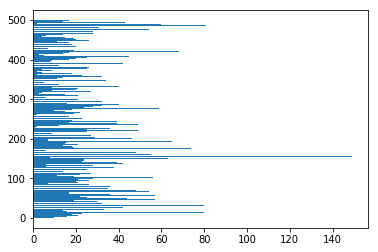

In [135]:
x = total_cluster[:, 0]
y = total_cluster[:, 1]

plt.barh(x, y)

In [136]:
cluster = 0
show = 1000


lines = np.array(lines)

current_data = lines[labels == cluster]

for current_datum in current_data[0 : show]:
    
    datum = current_datum.split("|")[2]
    
    print(datum)

Caffeinated chewing gum catches FDA's eye

Medieval eye remedy 'kills MRSA'

